### Курсовой проект для курса "Python для Data Science", Кашин Леонид Михайлович

Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).

Описание датасета:

Id - идентификационный номер квартиры;

DistrictId - идентификационный номер района;

Rooms - количество комнат;

Square - площадь;

LifeSquare - жилая площадь;

KitchenSquare - площадь кухни;

Floor - этаж;

HouseFloor - количество этажей в доме;

HouseYear - год постройки дома;

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности;

Social_1, Social_2, Social_3 - социальные показатели местности;

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья;

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров;

Price - цена квартиры.

#### 0. Load all necessary libraries and datasets

In [16]:
import numpy as np
import pandas as pd
# import pandas_profiling

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV

In [18]:
df = pd.read_csv('train.csv')

In [19]:
XX_test = pd.read_csv('test.csv')

#### 1. Анализ данных:

    - пропуски;
    - нули;
    - выбросы.

Все что под замену - в нули

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [21]:
XX_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [22]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [23]:
XX_test.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [25]:
XX_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


наблюдаем выбросы по параметру max во всех признаках, нули есть также - почти везде. Откровенные пропуски - только в двух признаках, причем как в train, так и в test. С типами данных тоже надо посмотреть.

Id сразу удалим

In [26]:
# df.drop(columns='Id', axis=0, inplace=True)

In [27]:
# Y_test.drop(columns='Id', axis=0, inplace=True)

In [28]:
 df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [29]:
def value_counts(df, type):

    df_bin_features = df.select_dtypes(include=type)

    for i, colname in enumerate(df_bin_features.columns):
        print(df_bin_features[colname].value_counts(), 'Length', len(df_bin_features[colname]))

In [30]:
value_counts(df, 'object')

B    9903
A      97
Name: Ecology_2, dtype: int64 Length 10000
B    9725
A     275
Name: Ecology_3, dtype: int64 Length 10000
B    9175
A     825
Name: Shops_2, dtype: int64 Length 10000


In [31]:
value_counts(df, 'int64')

2047     1
13588    1
5408     1
9502     1
3355     1
        ..
6758     1
2660     1
12899    1
8801     1
0        1
Name: Id, Length: 10000, dtype: int64 Length 10000
27     851
1      652
23     565
6      511
9      294
      ... 
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64 Length 10000
4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
42      1
33      1
37      1
31      1
Name: Floor, dtype: int64 Length 10000
1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1947           1
1916           1
1910           1
1928           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64 Length 10000
2     688
1     654
25    557
5     528

In [32]:
value_counts(df, 'float64')

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64 Length 10000
81.053044    1
54.002221    1
49.934561    1
53.317372    1
77.910891    1
            ..
57.134181    1
73.431719    1
46.049526    1
76.624790    1
97.664912    1
Name: Square, Length: 10000, dtype: int64 Length 10000
35.812832    1
58.218079    1
35.213655    1
23.656629    1
4.289714     1
            ..
82.418226    1
43.005439    1
56.867287    1
87.018830    1
33.743934    1
Name: LifeSquare, Length: 7887, dtype: int64 Length 10000
1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
41.0         2
112.0        2
25.0         2
43.0         2
51.0       

#### 2. Замена

* Id - идентификационный номер квартиры - преобразуем в index;
* DistrictId - идентификационный номер района - НУЛИ меняем на медиану;
* Rooms - количество комнат - НУЛИ меняем на медиану;
* LifeSquare - жилая площадь - ЕСЛИ меньше 10, то mediana;
* KitchenSquare - площадь кухни - ЕСЛИ меньше 8, то mediana;
* Square - площадь - ЕСЛИ сумма LS + KS больше, то меняем на сумму, ЕСЛИ ,больше, то LS = S - KS;
* Floor - этаж - Если >=1 AND <= HouseFloor, то НОРМ, если 0, то медианный % от HouseFloor;
* HouseFloor - количество этажей в доме ЕСЛИ < Floor, != 0, то / медианный %;
* HouseYear - год постройки дома; не больше 2020, целое число.
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности, Е1 - норм, остальные object
* Social_1, Social_2, Social_3 - социальные показатели местности, в S3 НУЛИ - замена на медиану, остальные норм;
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья; в H1 НУЛИ - замена на медиану;
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров; S1 НОРМ, S2 object
Price - цена квартиры.

In [33]:
df_District = set(df['DistrictId'])
XX_District = set(XX_test['DistrictId'])

In [34]:
union_district = set(list(df_District) + list(XX_District))

In [35]:
diff_df = list(set(union_district) - set(XX_District))
diff_df = diff_df * 2

In [36]:
diff_XX = list(set(union_district) - set(df_District))
diff_XX = diff_XX * 7

In [37]:
len(df.loc[df['DistrictId'] == 0, 'DistrictId'])

48

In [38]:
len(XX_test.loc[XX_test['DistrictId'] == 0, 'DistrictId'])

19

In [39]:
df.loc[df['DistrictId'] == 0, 'DistrictId'] = diff_XX[:-1]

In [40]:
XX_test.loc[XX_test['DistrictId'] == 0, 'DistrictId'] = diff_df[:-3]

In [41]:
df.loc[df['DistrictId'].isnull(), 'DistrictId'] = df['DistrictId'].median()
df.index = df['Id']
df.drop(columns='Id', axis=0, inplace=True)
df.loc[df['DistrictId'] == 0, 'DistrictId'] = df['DistrictId'].median()
df.loc[df['Rooms'] == 0, 'Rooms'] = df['Rooms'].median()
df.loc[df['LifeSquare'] < 10, 'LifeSquare'] = df['LifeSquare'].median()
df.loc[df['KitchenSquare'] < 6, 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square'] - df['KitchenSquare']
df.loc[df['Square'] < (df['LifeSquare'] + df['KitchenSquare']), 'Square'] = df['LifeSquare'] + df['KitchenSquare']
df.loc[df['Square'] > (df['LifeSquare'] + df['KitchenSquare']), 'LifeSquare'] = df['Square'] - df['KitchenSquare']
df.loc[df['HouseFloor'] < 1, 'HouseFloor'] = df['HouseFloor'].median()
df.loc[df['Floor'] < 1, 'Floor'] = df['Floor'].median()
df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor'] = df['Floor']
df.loc[df['HouseYear'] > 2019, 'HouseYear'] = 2020
df.loc[df['HouseYear'] < 1914, 'HouseYear'] = df['HouseYear'].median()
df.loc[df['Social_3'] == 0, 'Social_3'] = df['Social_3'].median()
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()

#### 3. Анализ коррелиции между признаками

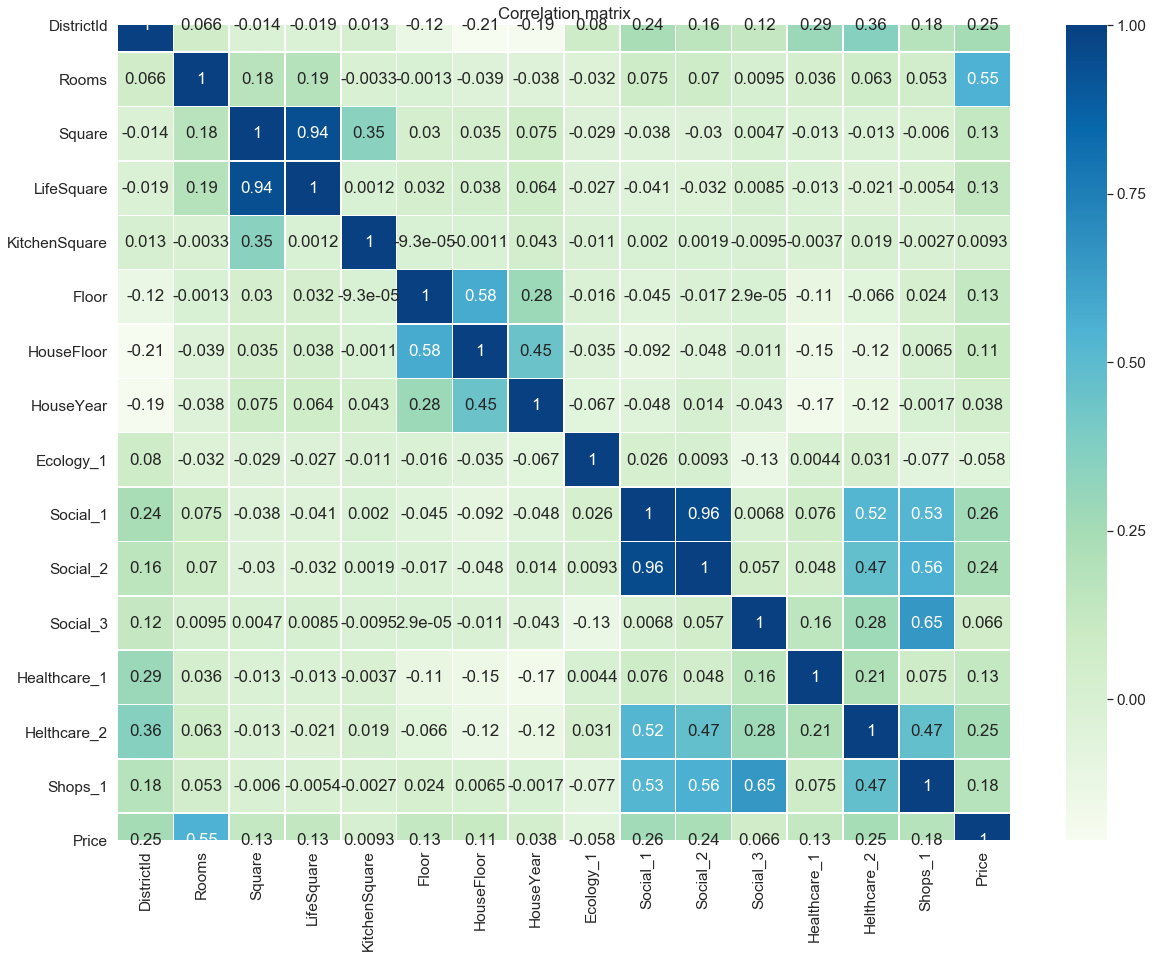

In [42]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

#### 4. Лишние признаки и новые признаки.

ввиду высокой корреляцией между Social_2 и Social_1, между всеми Square и Floor, есть подозрение, что их имеет смысл проредить.

Попробовал удалять разные комбинации - всегда становилось хуже, единственный вариант, который делал также - KitchenSquare. 

Обжектс и districtId переделываем в dummies

In [43]:
# df.drop(columns='KitchenSquare', axis=0, inplace=True)

In [44]:
# df.sort_values(by='DistrictId', ascending=False)

In [45]:
df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['DistrictId'])], axis=1)
df.drop(columns='Ecology_2', axis=0, inplace=True)
df.drop(columns='Ecology_3', axis=0, inplace=True)
df.drop(columns='Shops_2', axis=0, inplace=True)
df.drop(columns='DistrictId', axis=0, inplace=True)

In [46]:
df.dtypes

Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
                  ...   
208.0              uint8
209.0              uint8
210.0              uint8
211.0              uint8
212.0              uint8
Length: 232, dtype: object

In [47]:
XX_test.index = XX_test['Id']
XX_test.drop(columns='Id', axis=0, inplace=True)
XX_test.loc[XX_test['DistrictId'].isnull(), 'DistrictId'] = XX_test['DistrictId'].median()
XX_test.loc[XX_test['DistrictId'] == 0, 'DistrictId'] = XX_test['DistrictId'].median()
XX_test.loc[XX_test['Rooms'] == 0, 'Rooms'] = XX_test['Rooms'].median()
XX_test.loc[XX_test['LifeSquare'] < 10, 'LifeSquare'] = XX_test['LifeSquare'].median()
XX_test.loc[XX_test['KitchenSquare'] < 6, 'KitchenSquare'] = XX_test['KitchenSquare'].median()
XX_test.loc[XX_test['LifeSquare'].isnull(), 'LifeSquare'] = XX_test['Square'] - XX_test['KitchenSquare']
XX_test.loc[XX_test['Square'] < (XX_test['LifeSquare'] + XX_test['KitchenSquare']), 'Square'] = XX_test['LifeSquare'] + XX_test['KitchenSquare']
XX_test.loc[XX_test['Square'] > (XX_test['LifeSquare'] + XX_test['KitchenSquare']), 'LifeSquare'] = XX_test['Square'] - XX_test['KitchenSquare']
XX_test.loc[XX_test['HouseFloor'] < 1, 'HouseFloor'] = XX_test['HouseFloor'].median()
XX_test.loc[XX_test['Floor'] < 1, 'Floor'] = XX_test['Floor'].median()
XX_test.loc[XX_test['Floor'] > XX_test['HouseFloor'], 'HouseFloor'] = XX_test['Floor']
XX_test.loc[XX_test['HouseYear'] > 2019, 'HouseYear'] = 2020
XX_test.loc[XX_test['HouseYear'] < 1914, 'HouseYear'] = XX_test['HouseYear'].median()
XX_test.loc[XX_test['Social_3'] == 0, 'Social_3'] = XX_test['Social_3'].median()
XX_test.loc[XX_test['Healthcare_1'].isnull(), 'Healthcare_1'] = XX_test['Healthcare_1'].median()

In [48]:
# XX_test.sort_values(by='DistrictId', ascending=False)

In [49]:
XX_test = pd.concat([XX_test, pd.get_dummies(XX_test['Ecology_2'])], axis=1)
XX_test = pd.concat([XX_test, pd.get_dummies(XX_test['Ecology_3'])], axis=1)
XX_test = pd.concat([XX_test, pd.get_dummies(XX_test['Shops_2'])], axis=1)
XX_test = pd.concat([XX_test, pd.get_dummies(XX_test['DistrictId'])], axis=1)
XX_test.drop(columns='Ecology_2', axis=0, inplace=True)
XX_test.drop(columns='Ecology_3', axis=0, inplace=True)
XX_test.drop(columns='Shops_2', axis=0, inplace=True)
XX_test.drop(columns='DistrictId', axis=0, inplace=True)

In [50]:
XX_test.dtypes

Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
                  ...   
208.0              uint8
209.0              uint8
210.0              uint8
211.0              uint8
212.0              uint8
Length: 231, dtype: object

In [51]:
# df.drop(columns='A', axis=0, inplace=True)
df.head().T

Id,14038,15053,4765,5809,10783
Rooms,2.000000,3.00000,2.000000,2.000000,1.000000
Square,47.981561,65.68364,44.947953,61.731512,39.649192
LifeSquare,41.981561,57.68364,38.947953,52.731512,32.649192
KitchenSquare,6.000000,8.00000,6.000000,9.000000,7.000000
Floor,7.000000,7.00000,8.000000,8.000000,11.000000
...,...,...,...,...,...
208.0,0.000000,0.00000,0.000000,0.000000,0.000000
209.0,0.000000,0.00000,0.000000,0.000000,0.000000
210.0,0.000000,0.00000,0.000000,0.000000,0.000000
211.0,0.000000,0.00000,0.000000,0.000000,0.000000


In [52]:
y = pd.Series(df["Price"])

In [53]:
X = df.drop(columns='Price', axis=0)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred = lr.predict(X_test)

y_pred.shape

(3000,)

In [58]:
r2_score(y_test, y_pred)

0.568216092823906

Результат не ахти(

In [59]:
model = RandomForestRegressor(
    n_estimators=1000,
    criterion='mse',
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
)

In [60]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [61]:
y_pred_tree = model.predict(X_test)

y_pred_tree.shape

(3000,)

In [62]:
r2_score(y_test, y_pred_tree) 

0.7076190735762604

тоже не очень

### Настройка и оценка финальной модели

**Подбор гиперпараметров**

In [63]:
gb_model = GradientBoostingRegressor(random_state=21)
gb_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
params = {'n_estimators':[50, 100, 200, 400], 
          'max_depth':[3, 5, 7, 10]}

gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=3, random_state=21, shuffle=True), n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                            

In [65]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [66]:
gs.best_score_

0.7385975346075391

**Обучение и оценка модели**

In [67]:
final_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=21)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
matplotlib.rcParams.update({'font.size': 14})

def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

R2:	0.872
MAE:	21688.41
MSE:	1105983866.251


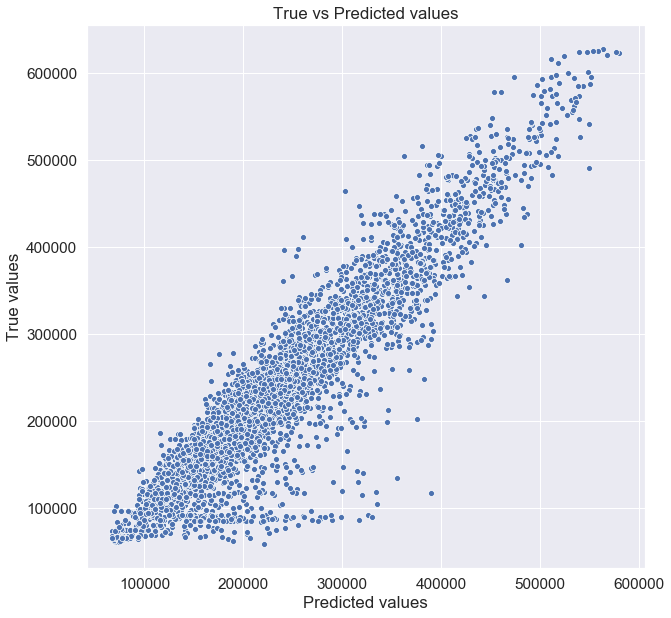

In [69]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.726
MAE:	28260.953
MSE:	2360931819.233


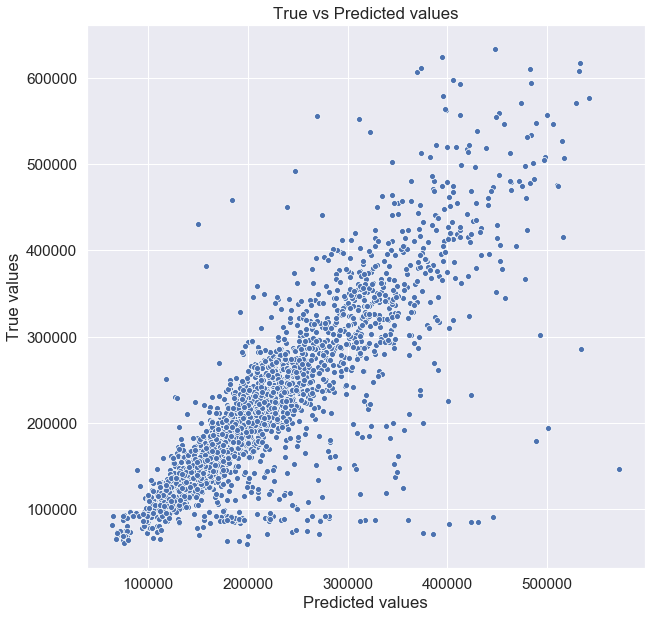

In [70]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

Прямо скажем - не фонтан конечно(








**Важность признаков**

In [71]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.338185
0,Rooms,0.112569
9,Social_2,0.094849
8,Social_1,0.089949
10,Social_3,0.067120
...,...,...
129,110,0.000000
172,153,0.000000
60,41,0.000000
170,151,0.000000


In [118]:
XX_test_preds = final_model.predict(XX_test)

In [110]:
a = pd.read_csv('test.csv')

In [ ]:
a.loc[a['Id'] > 0, 'Square'] = XX_test_preds

In [ ]:
a.drop(columns='Ecology_2', axis=0, inplace=True)
a.drop(columns='Ecology_3', axis=0, inplace=True)
a.drop(columns='Shops_2', axis=0, inplace=True)
a.drop(columns='DistrictId', axis=0, inplace=True)
a.drop(columns='Rooms', axis=0, inplace=True)
a.drop(columns='LifeSquare', axis=0, inplace=True)
a.drop(columns='KitchenSquare', axis=0, inplace=True)
a.drop(columns='Floor', axis=0, inplace=True)
a.drop(columns='HouseFloor', axis=0, inplace=True)

In [ ]:
a.drop(columns='Healthcare_1', axis=0, inplace=True)
a.drop(columns='Social_2', axis=0, inplace=True)
a.drop(columns='Social_3', axis=0, inplace=True)
a.drop(columns='Shops_1', axis=0, inplace=True)
a.drop(columns='Ecology_1', axis=0, inplace=True)

In [123]:
a.drop(columns='Social_1', axis=0, inplace=True)
a.drop(columns='Helthcare_2', axis=0, inplace=True)
a.drop(columns='HouseYear', axis=0, inplace=True)

In [127]:
XX_test_preds = a.copy()

In [132]:
XX_test_preds=XX_test_preds.rename(columns = {'Square': 'Price'})  
XX_test_preds

,Id,Price
0,725,157726.583747
1,15856,197585.713409
2,5480,169239.254230
3,15664,316696.843666
4,14275,135109.351061
...,...,...
4995,8180,247534.021848
4996,4695,132872.854560
4997,5783,312063.869640
4998,4780,194404.553264


In [134]:
XX_test_preds.to_csv('LKashin_predictions.csv', encoding='utf-8', index=False)

С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Целевая переменная:
Price

Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

> Требования к решению:
> 1. R2 > 0.6
> 2. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример
> SShirkin_solution.ipynb
> 3. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv 
> Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.
